In [ ]:
#"C:\Users\guygj\Downloads\stream_rot.txt"
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
from scipy import stats
from rotation_matrix import obs_from_pos6d

ModuleNotFoundError: No module named 'rotation_matrix'

Code to perform the rotation correction

In [ ]:
data = np.genfromtxt(r"stream_rot.txt")

plt.rcParams['font.size'] = 13

x = data[:, 0] + 8.178
y = data[:, 1]
z = data[:, 2]

print(len(x))

# rotation matrices
def compute_rotation_matrices(angles):
    a, b = angles
    Rxz = np.array([[np.cos(b), 0, -np.sin(b)],
                    [0, 1, 0],
                    [np.sin(b), 0, np.cos(b)]])
    Rxy = np.array([[np.cos(a), np.sin(a), 0],
                    [-np.sin(a), np.cos(a), 0],
                    [0, 0, 1]])
    return Rxz, Rxy

# minimize (sum of squares of z)
def objective_function(angles):
    Rxz, Rxy = compute_rotation_matrices(angles)
    rotated_coords = np.dot(Rxz, np.dot(Rxy, np.vstack((x, y, z))))
    z_rotated = rotated_coords[2]
    return np.sum(z_rotated ** 2)

initial_guess = [0.0, 0.0]
result = minimize(objective_function, initial_guess)
optimal_angles = result.x
a_optimal, b_optimal = optimal_angles
Rxz_optimal, Rxy_optimal = compute_rotation_matrices(optimal_angles)

rotated_coords = np.dot(Rxz_optimal, np.dot(Rxy_optimal, np.vstack((x, y, z))))

# Set z-coordinates to zero

rotated_coords_copy = rotated_coords.copy()
rotated_coords_copy[2, :] = 0

# Remove outliers using z-score
z_scores = stats.zscore(rotated_coords_copy[:2, :], axis=1)
outlier_indices = np.abs(z_scores) > 1.9  # Adjust threshold as needed
filtered_coords = rotated_coords_copy[:, ~outlier_indices.any(axis=0)]

# column vectors
X = filtered_coords[0][:, np.newaxis]
Y = filtered_coords[1][:, np.newaxis]

plt.figure(figsize=(8, 6))
plt.scatter(rotated_coords[0, :], rotated_coords[1, :], color='blue', label='Original Data',s=0.1)
plt.scatter(filtered_coords[0, :], filtered_coords[1, :], color='red', label='Filtered Data',s=0.5)

plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Filtered Stellar Stream Data')
plt.legend()

plt.grid(True)

fig = plt.figure(figsize=(10, 8))
ax_original = fig.add_subplot(111, projection='3d')
ax_original.scatter(x, y, z, c='b', marker='o', s=0.01 )
ax_original.set_xlabel('X (kpc)')
ax_original.set_ylabel('Y (kpc)')
ax_original.set_zlabel('Z (kpc)')
ax_original.set_title('Original Distribution of Stars')
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rotated_coords[0], rotated_coords[1], rotated_coords[2], c='b', marker='o', s=0.01)
ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')
#ax.set_title('Optimal Distribution of Stars after Rotation')
plt.show()


FileNotFoundError: stream_rot.txt not found.

In [ ]:
# Find indices of filtered data points
filtered_indices = np.where(outlier_indices.any(axis=0))

# Remove filtered data points from rotated_coords
rotated_coords = np.delete(rotated_coords, filtered_indices, axis=1)

# Separate positions and velocities
pos = data[:, :3] + np.array([8.127,0,0]) # Columns 1, 2, 3 correspond to x, y, z (kpc)
vel = data[:, 3:]  # Columns 4, 5, 6 correspond to vx, vy, vz (km/s)

# Remove filtered data points from positions and velocities
print(np.shape(pos))

'''for axis in range (3):
    np.delete(pos[:,axis] , filtered_indices)
    np.delete(vel[:,axis] , filtered_indices)'''

pos = np.delete(pos, filtered_indices, axis = 0)
vel = np.delete(vel, filtered_indices, axis = 0)
print(np.shape(pos))

(10000, 3)
(8920, 3)


In [ ]:
len(filtered_indices[0])

919

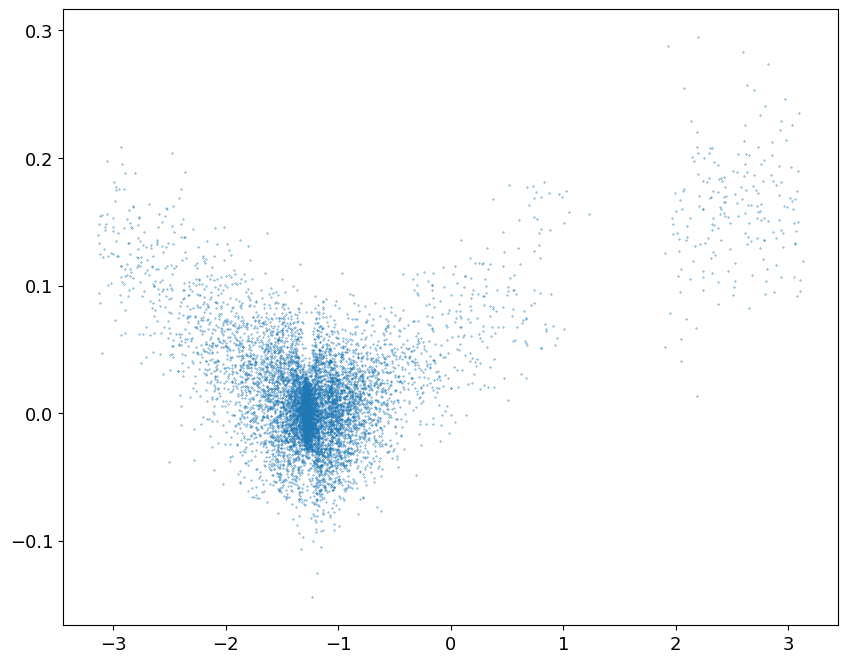

-1.2715230755858773


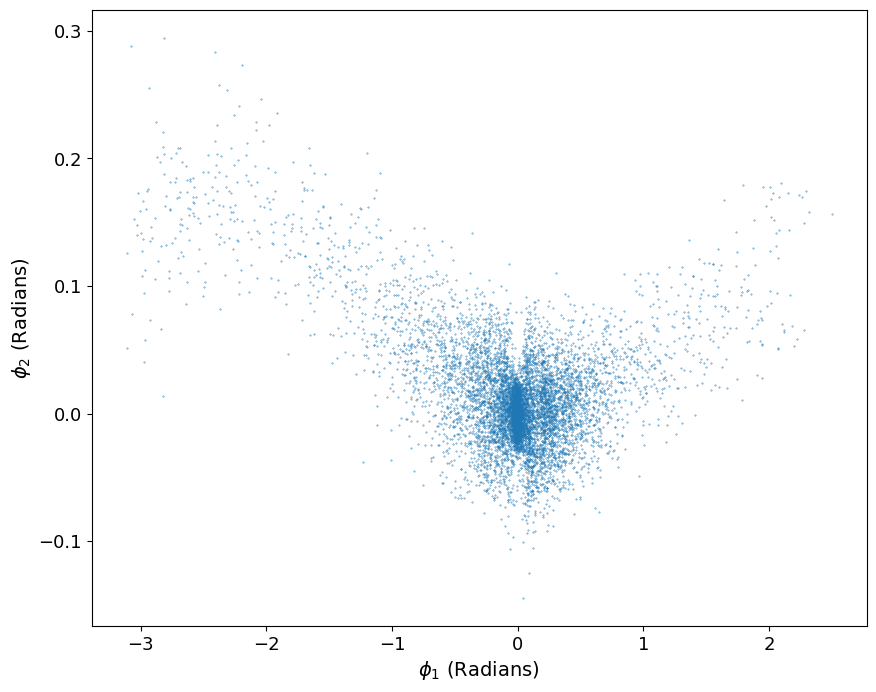

In [ ]:
phi1 = np.arctan2(rotated_coords[1], rotated_coords[0])
phi2 = np.arcsin(rotated_coords[2]/sum(rotated_coords[i]**2 for i in range(3))**0.5)

fig = plt.figure(figsize=(10,8))
plt.scatter(phi1,phi2, s = 0.1)
plt.show()

print(np.median(phi1))
psi = np.median(phi1)

Rot = np.array([[np.cos(psi), np.sin(psi), 0],
                [-np.sin(psi), np.cos(psi), 0],
                [0, 0, 1]])

Rot_Total = np.dot(Rot,np.dot(Rxz_optimal,Rxy_optimal))

rotated_coords = np.dot(Rot, np.vstack((rotated_coords[0], rotated_coords[1], rotated_coords[2])))

phi1 = np.arctan2(rotated_coords[1], rotated_coords[0])
phi2 = np.arcsin(rotated_coords[2]/sum(rotated_coords[i]**2 for i in range(3))**0.5)

fig = plt.figure(figsize=(10,8))
plt.scatter(phi1,phi2, s = 0.1)

plt.xlabel(r'$\phi_1$ (Radians)', fontsize=14)  # Label for x-axis with fontsize 14
plt.ylabel(r'$\phi_2$ (Radians)', fontsize=14)  # Label for y-axis with fontsize 14

plt.show()

In [ ]:
Rot_Total

array([[ 0.90224476, -0.35312617, -0.24750009],
       [ 0.01772009,  0.60382351, -0.79692105],
       [ 0.43086006,  0.71463212,  0.55105403]])

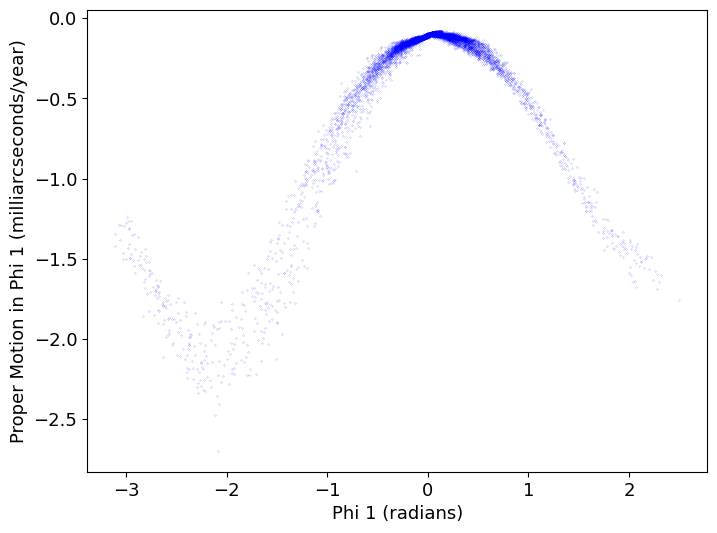

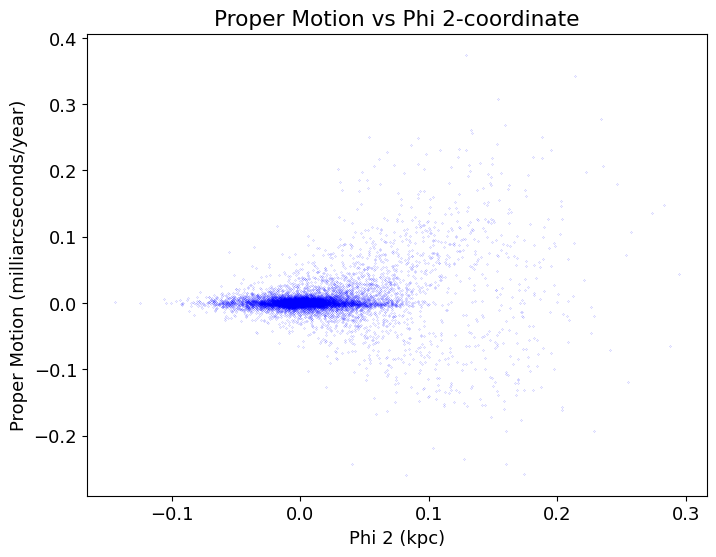

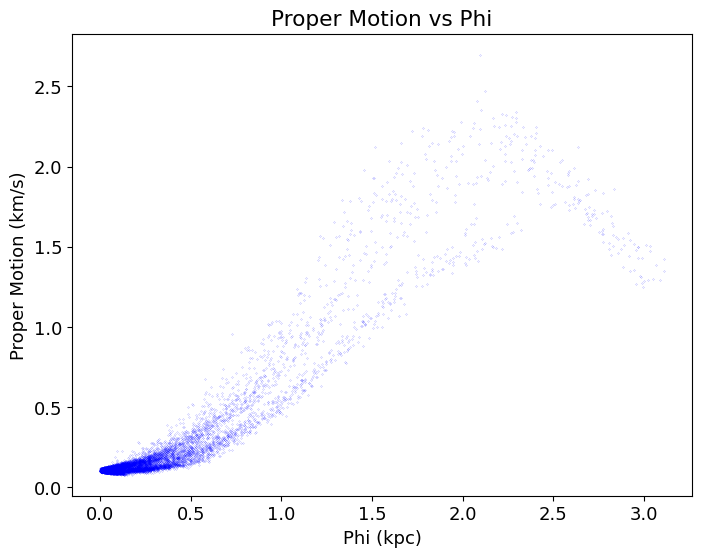

In [ ]:
#filtered_indices = np.where(outlier_indices.any(axis=0))

# Remove filtered data points
#pos = np.delete(pos, filtered_indices, axis=0)
#vel = np.delete(vel, filtered_indices, axis=0)

# transformation matrix
a_g = np.array([[-0.0548755604, +0.4941094279, -0.8676661490],
                [-0.8734370902, -0.4448296300, -0.1980763734],
                [-0.4838350155, 0.7469822445, +0.4559837762]])

# rotate velRot))
Mrot_ag = np.dot(Rot_Total, a_g.T)

phi1_obs, phi2_obs, d_obs, pm1_obs, pm2_obs, vgsr_obs = obs_from_pos6d(pos, vel, Mrot_ag, R0=0, vlsr=np.array([0,0,0]))

plt.figure(figsize=(8, 6))
plt.scatter(phi1, pm1_obs, c='b', marker='o', s=0.01)

plt.xlabel('Phi 1 (radians)')
plt.ylabel('Proper Motion in Phi 1 (milliarcseconds/year)')
#plt.title('Proper Motion vs Phi 1-coordinate')
plt.show()

# proper motion 2 against phi2
plt.figure(figsize=(8, 6))
plt.scatter(phi2, pm2_obs, c='b', marker='o', s=0.01)

plt.xlabel('Phi 2 (kpc)')
plt.ylabel('Proper Motion (milliarcseconds/year)')
plt.title('Proper Motion vs Phi 2-coordinate')
plt.show()

# total p against phi
plt.figure(figsize=(8, 6))
plt.scatter((phi1**2+phi2**2)**0.5, (pm1_obs**2+pm2_obs**2)**0.5, c='b', marker='o', s=0.01)

plt.xlabel('Phi (kpc)')
plt.ylabel('Proper Motion (km/s)')
plt.title('Proper Motion vs Phi')
plt.show()


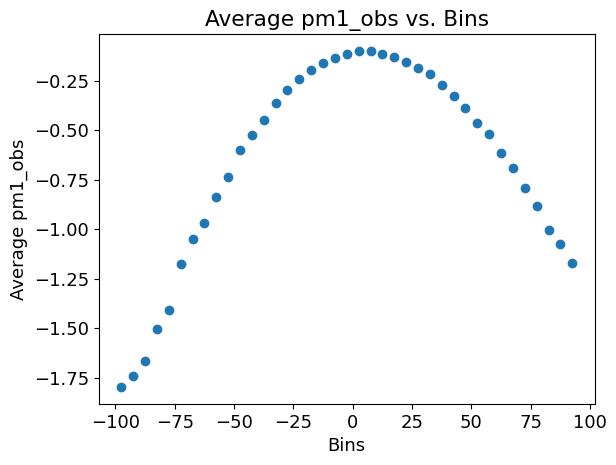

TypeError: hist() missing 1 required positional argument: 'x'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bin_width = 5
mybins = np.arange(-100, 100, bin_width)
hist, bins = np.histogram(phi1_obs, bins=mybins)
bins = (bins[1:] + bins[:-1]) / 2

pm1_avg = []
for i in range(len(bins)):
    mask = np.where(np.fabs(phi1_obs - bins[i]) < bin_width / 2)
    pm1_avg = np.append(pm1_avg, np.mean(pm1_obs[mask]))

plt.scatter(bins, pm1_avg)

# Labeling the axes
plt.xlabel('Bins')
plt.ylabel('Average pm1_obs')
plt.title('Average pm1_obs vs. Bins')

plt.show()

plt.hist(bins=300,alpha = 0.3, density=True, label="Density");
plt.hist(angles,weights=np.fabs(pml/np.cos(b*np.pi/180)),bins=500,alpha=0.3,density=True, label="Proper Motion Adjusted");

#plt.hist(filtered_ang_data,bins=500,alpha = 0.3, density=True,label="Filtered snap < 10");
#plt.hist(filtered_ang_data,weights=np.fabs(pmlf/np.cos(bf*np.pi/180)),bins=500,alpha=0.3,density=True, label="Filtered snap < 10 Proper Motion Adjusted");

#plt.xscale('log')  # Set x-axis to log scale
plt.xlabel('Angle (Radians))')
plt.ylabel('Log Density')
plt.yscale('log')  # Set y-axis to log scale
plt.legend(bbox_to_anchor=(0.5, 1), loc='lower center')

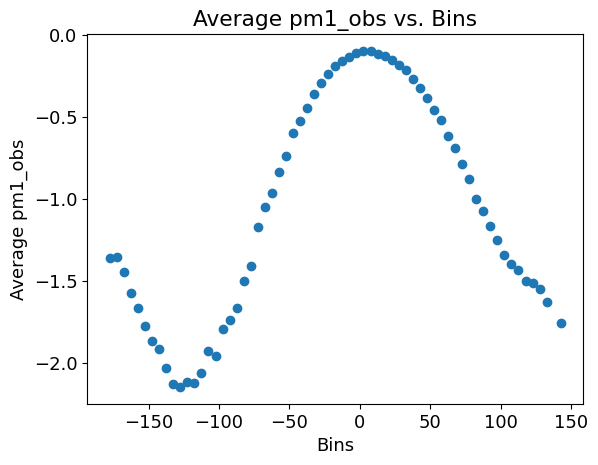

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bin_width = 5
mybins = np.arange(-180, 180, bin_width)
hist, bins = np.histogram(phi1_obs, bins=mybins)
bins = (bins[1:] + bins[:-1]) / 2

pm1_avg = []
for i in range(len(bins)):
    mask = np.where(np.fabs(phi1_obs - bins[i]) < bin_width / 2)
    pm1_avg = np.append(pm1_avg, np.mean(pm1_obs[mask]))

plt.scatter(bins, pm1_avg)

# Labeling the axes
plt.xlabel('Bins')
plt.ylabel('Average pm1_obs')
plt.title('Average pm1_obs vs. Bins')

plt.show()

    

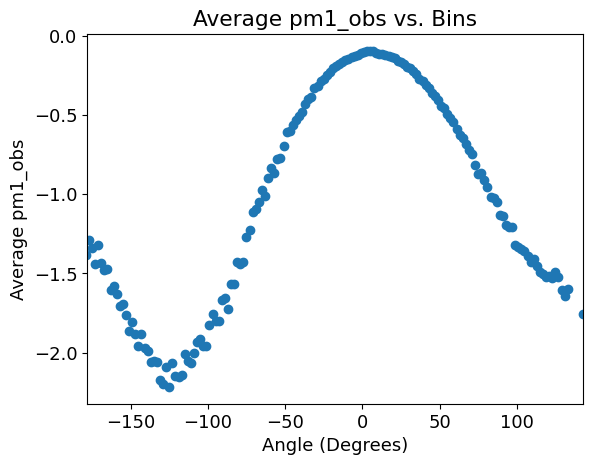

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bin_width = 2
mybins = np.arange(-3.14, 3.14, bin_width)
hist, bins = np.histogram(phi1_obs, bins=mybins)
bins = (bins[1:] + bins[:-1]) / 2

pm1_avg = []
for i in range(len(bins)):
    mask = np.where(np.fabs(phi1_obs - bins[i]) < bin_width / 2)
    pm1_avg = np.append(pm1_avg, np.mean(pm1_obs[mask]))

plt.scatter(bins, pm1_avg)

# Labeling the axes
plt.xlabel('Angle (Degrees)')
plt.ylabel('Average pm1_obs')
plt.title('Average pm1_obs vs. Bins')

# Set the x-axis limits based on the range of phi1_obs
plt.xlim(min(phi1_obs), max(phi1_obs))
plt.show()


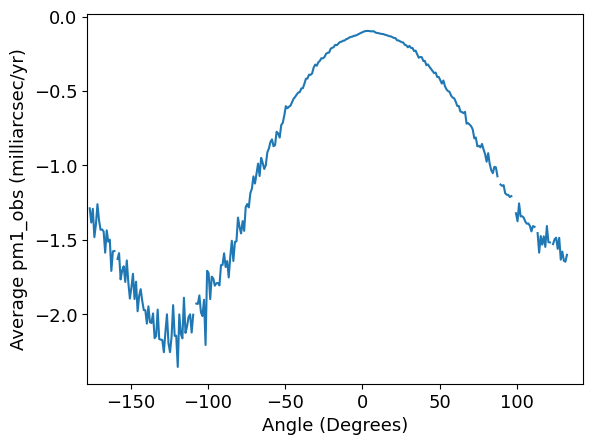

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bin_width = 1
mybins = np.arange(-180, 180, bin_width)
hist, bins = np.histogram(phi1_obs, bins=mybins)
bins = (bins[1:] + bins[:-1]) / 2

pm1_avg = []
for i in range(len(bins)):
    mask = np.where(np.fabs(phi1_obs - bins[i]) < bin_width / 2)
    pm1_avg.append(np.mean(pm1_obs[mask]))

plt.plot(bins, pm1_avg, linestyle='-')  # Plotting point-to-point line without markers

# Labeling the axes
plt.xlabel('Angle (Degrees)')
plt.ylabel('Average pm1_obs (milliarcsec/yr)')
#plt.title('Average pm1_obs vs. Bins')

# Set the x-axis limits based on the range of phi1_obs
plt.xlim(min(phi1_obs), max(phi1_obs))
plt.show()


In [ ]:
Rho_Cor = np.fabs(pm1_avg) * hist
#plt.scatter(bins, Rho_Cor)

# Plotting lines without points for the second plot
plt.plot(bins, Rho_Cor, linestyle='-')

# Labeling the axes
plt.xlabel('Angle (Degrees)')
plt.ylabel('Density')
#plt.yscale('log')
#plt.title('Line plots without points')

plt.show()

NameError: name 'np' is not defined

C:\Users\guygj\AppData\Local\Temp\ipykernel_21572\1794206205.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  params_normal, _ = curve_fit(normal, clean_bins, clean_Rho_Cor, p0=initial_guess_normal)


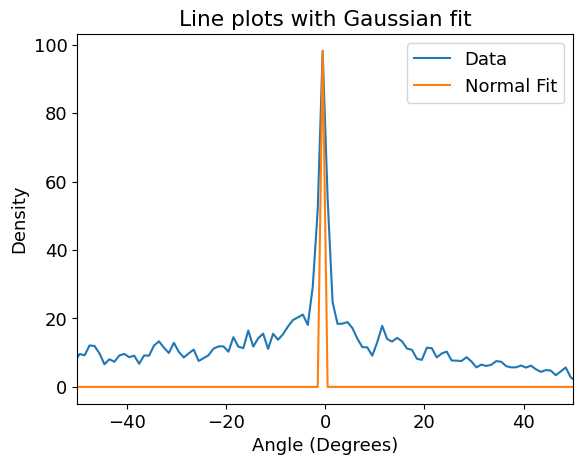

Mean (peak) of the Gaussian: -0.5023038859788318
Standard deviation (FWHM) of the Gaussian: 0.007205165254192161


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define your statistical functions to fit
def normal(x, mu, sigma):
    return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Assuming bins and Rho_Cor are your data
# Clean the data to remove NaNs and infinite values
clean_indices = np.isfinite(bins) & np.isfinite(Rho_Cor)
clean_bins = bins[clean_indices]
clean_Rho_Cor = Rho_Cor[clean_indices]

# Define the initial guess for the parameters
initial_guess_normal = [np.mean(clean_bins), np.std(clean_bins)]

# Perform curve fitting
params_normal, _ = curve_fit(normal, clean_bins, clean_Rho_Cor, p0=initial_guess_normal)

# Generate fitted curve
fit_normal = normal(clean_bins, *params_normal)

# Plotting
plt.plot(clean_bins, clean_Rho_Cor, linestyle='-', label='Data')
plt.plot(clean_bins, fit_normal, label='Normal Fit')

# Labeling the axes
plt.xlabel('Angle (Degrees)')
plt.xlim(-50,50)
plt.ylabel('Density')
plt.title('Line plots with Gaussian fit')
plt.legend()
plt.show()

# Print the parameters of the Gaussian fit
mu, sigma = params_normal
print("Mean (peak) of the Gaussian:", mu)
print("Standard deviation (FWHM) of the Gaussian:", 2 * np.sqrt(2 * np.log(2)) * sigma)



C:\Users\guygj\AppData\Local\Temp\ipykernel_21572\2028712453.py:24: OptimizeWarning: Covariance of the parameters could not be estimated
  params_student_t, _ = curve_fit(student_t, clean_bins, clean_Rho_Cor, p0=[1, np.mean(clean_bins), np.std(clean_bins)])
C:\Users\guygj\AppData\Local\Temp\ipykernel_21572\2028712453.py:25: OptimizeWarning: Covariance of the parameters could not be estimated
  params_logistic, _ = curve_fit(logistic, clean_bins, clean_Rho_Cor, p0=[np.mean(clean_bins), np.std(clean_bins)])


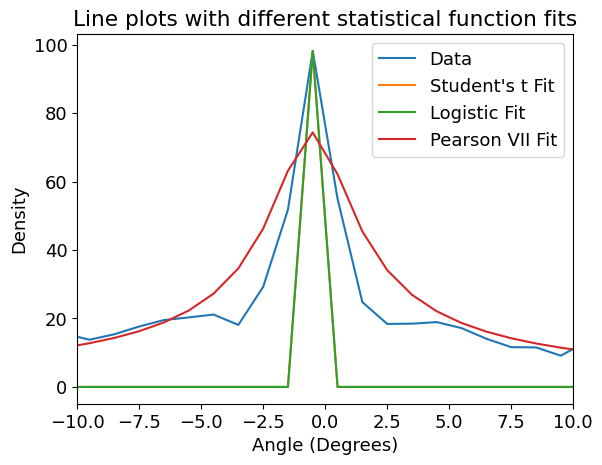

Student's t Fit Parameters: [ 2.38770497e+02 -5.02454127e-01  2.56680047e-03]
Logistic Fit Parameters: [-0.49988461  0.00254452]
Pearson VII Fit Parameters: [-4.99999619e-01  1.56427817e+00 -5.27931524e-01  2.78853110e-04]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

# Assuming bins and Rho_Cor are your data

# Clean the data to remove NaNs and infinite values
clean_indices = np.isfinite(bins) & np.isfinite(Rho_Cor)
clean_bins = bins[clean_indices]
clean_Rho_Cor = Rho_Cor[clean_indices]

# Define the PDFs of the distributions
def student_t(x, df, loc, scale):
    return stats.t.pdf(x, df, loc=loc, scale=scale)

def logistic(x, loc, scale):
    return stats.logistic.pdf(x, loc=loc, scale=scale)

def pearson_vii(x, m, q, loc, scale):
    return (scale * (1 + ((x - loc) / q)**2)**(-m - 1)) / (q * np.pi * stats.beta(m + 0.5, 0.5).mean())

# Perform curve fitting
params_student_t, _ = curve_fit(student_t, clean_bins, clean_Rho_Cor, p0=[1, np.mean(clean_bins), np.std(clean_bins)])
params_logistic, _ = curve_fit(logistic, clean_bins, clean_Rho_Cor, p0=[np.mean(clean_bins), np.std(clean_bins)])
params_pearson_vii, _ = curve_fit(pearson_vii, clean_bins, clean_Rho_Cor, p0=[1, 1, np.mean(clean_bins), np.std(clean_bins)])

# Generate fitted curves
fit_student_t = student_t(clean_bins, *params_student_t)
fit_logistic = logistic(clean_bins, *params_logistic)
fit_pearson_vii = pearson_vii(clean_bins, *params_pearson_vii)

# Plotting
plt.plot(clean_bins, clean_Rho_Cor, linestyle='-', label='Data')
plt.plot(clean_bins, fit_student_t, label='Student\'s t Fit')
plt.plot(clean_bins, fit_logistic, label='Logistic Fit')
plt.plot(clean_bins, fit_pearson_vii, label='Pearson VII Fit')

# Labeling the axes
plt.xlabel('Angle (Degrees)')
plt.xlim(-10,10)
plt.ylabel('Density')
plt.title('Line plots with different statistical function fits')
plt.legend()
plt.show()

# Print the parameters of the fits
print("Student's t Fit Parameters:", params_student_t)
print("Logistic Fit Parameters:", params_logistic)
print("Pearson VII Fit Parameters:", params_pearson_vii)
